> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.testing import assert_frame_equal
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [21]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 4.3MB/s eta 0:00:01    48% |███████████████▌                | 4.6MB 29.4MB/s eta 0:00:01    63% |████████████████████▎           | 6.0MB 31.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01   20% |██████▍                         | 2.7MB 28.4MB/s eta 0:00:01    41% |█████████████▏                  | 5.5MB 30.6MB/s eta 0:00:01    72% |███████████████████████▏        | 9.7MB 26.9MB/s eta 0:00:01    93% |█████████████████████████████▉  | 12.5MB 28.7MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 20.2MB/s ta 0:00:01   20% |██████▋                         | 51kB 22.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Su

In [34]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 296kB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.7MB/s eta 0:00:01  1% |▍                               | 133kB 28.0MB/s eta 0:00:01    27% |█████████                       | 3.2MB 33.7MB/s eta 0:00:01    80% |█████████████████████████▊      | 9.3MB 31.0MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 751kB/s eta 0:00:01  9% |███                             | 4.7MB 30.6MB/s eta 0:00:02    12% |████                            | 6.3MB 33.3MB/s eta 0:00:02    15% |█████                           | 7.8MB 29.6MB/s eta 0:00:02    32% |██████████▍                     | 16.1MB 22.6MB/s eta 0:00:02    35% |███████████▎                    | 17.5MB 26.7MB/s eta 0:00:02    40% |█████████████                   | 20.2MB 27.2MB/s eta 0:00:02    43% |██████████████                  | 21.5MB 27.1MB/s eta 0:00:02    49% |███████████████▊                | 24.2MB 29.8MB/s eta 0:00:01    57% |██████████████████▍   

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [4]:
df.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

In [5]:
# Some cloumns aren't necessary for our stats.
#We better delete them
unwanted_columns=['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']
df.drop(unwanted_columns, axis=1, inplace=True)
df.shape

(10866, 13)

In [6]:
#Checking for duplicates
df.duplicated().sum()

1

In [7]:
#Delete duplicated values
df.drop_duplicates(inplace=True)

In [8]:
#Time to check for Nulls
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [9]:
#Deleting Nulls
df.dropna(inplace=True)
df.shape

(9772, 13)

In [10]:
#Checking for Zero Values since we can't have a Zero budget/revenue/runtime movie
print('Number of Zero revenue movies:{}'.format(df.query('revenue == 0').count().sum())),
print('Number of Zero budget movies:{}'.format(df.query('budget==0').count().sum())),
print('Number of Zero runtime movies:{}'.format(df.query('runtime==0').count().sum()))

Number of Zero revenue movies:65286
Number of Zero budget movies:61763
Number of Zero runtime movies:169


In [11]:
#The number of Zero budget movies = that of Zero budget_adj = 71265 we need to check if they are the same rows
print('Number of Zero budget movies:{}'.format(df.query('budget==0').count().sum()))

Number of Zero budget movies:61763


In [12]:
df = df[df.runtime != 0]
df = df[df.budget != 0]
df = df[df.revenue != 0]
df.shape

(3805, 13)

In [13]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [14]:
#To check if there is a movie with a non-logical release year
df.query('2022 < release_year < 1922').count().sum()

0

In [15]:
#Converting the release date datatype
df.release_date = df.release_date.astype('datetime64[ns]')

In [16]:
#END OF CLEANING

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Who is the most participating actor?)

In [17]:
#Check the cast column
df.cast.head(2)

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
Name: cast, dtype: object

In [18]:
#Spliting the string to see how does the record look like
df.cast.str.split('|')[0]

['Chris Pratt',
 'Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson']

In [19]:
type(df.cast.str.split('|').any())

list

In [20]:
len(df.cast.str.split('|').any())

5

In [21]:
#It's now obvious that spliting the cast string would return us a list with 5 names
#Splitting it more to have one name only in each cell. This got to return us the same values as in df.cast.str.split('|')[0]
df_actors = df.cast.str.split("|").explode()
df_actors.head()

0            Chris Pratt
0    Bryce Dallas Howard
0            Irrfan Khan
0      Vincent D'Onofrio
0          Nick Robinson
Name: cast, dtype: object

In [22]:
best_actor = df_actors.value_counts().head(10)
best_actor

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Morgan Freeman        34
Tom Hanks             34
Brad Pitt             34
Sylvester Stallone    34
Name: cast, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


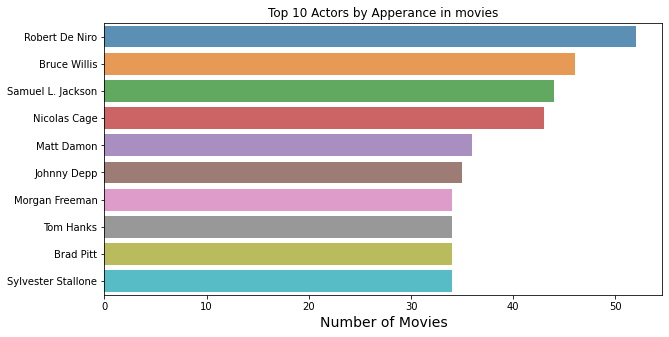

In [23]:
plt.figure(figsize=(10,5))
sns.barplot( best_actor.values, best_actor.index, alpha=0.8)
plt.title('Top 10 Actors by Apperance in movies')
plt.ylabel('', fontsize=14)
plt.xlabel('Number of Movies', fontsize=14)
plt.show()

### Research Question 2  (What is the share of each genre of the movies?)

In [24]:
df_genres = df.genres.str.split("|").explode()
df_genres.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
Name: genres, dtype: object

In [25]:
pie_genres = df_genres.value_counts()
pie_genres.head()

Drama        1729
Comedy       1335
Thriller     1194
Action       1076
Adventure     743
Name: genres, dtype: int64

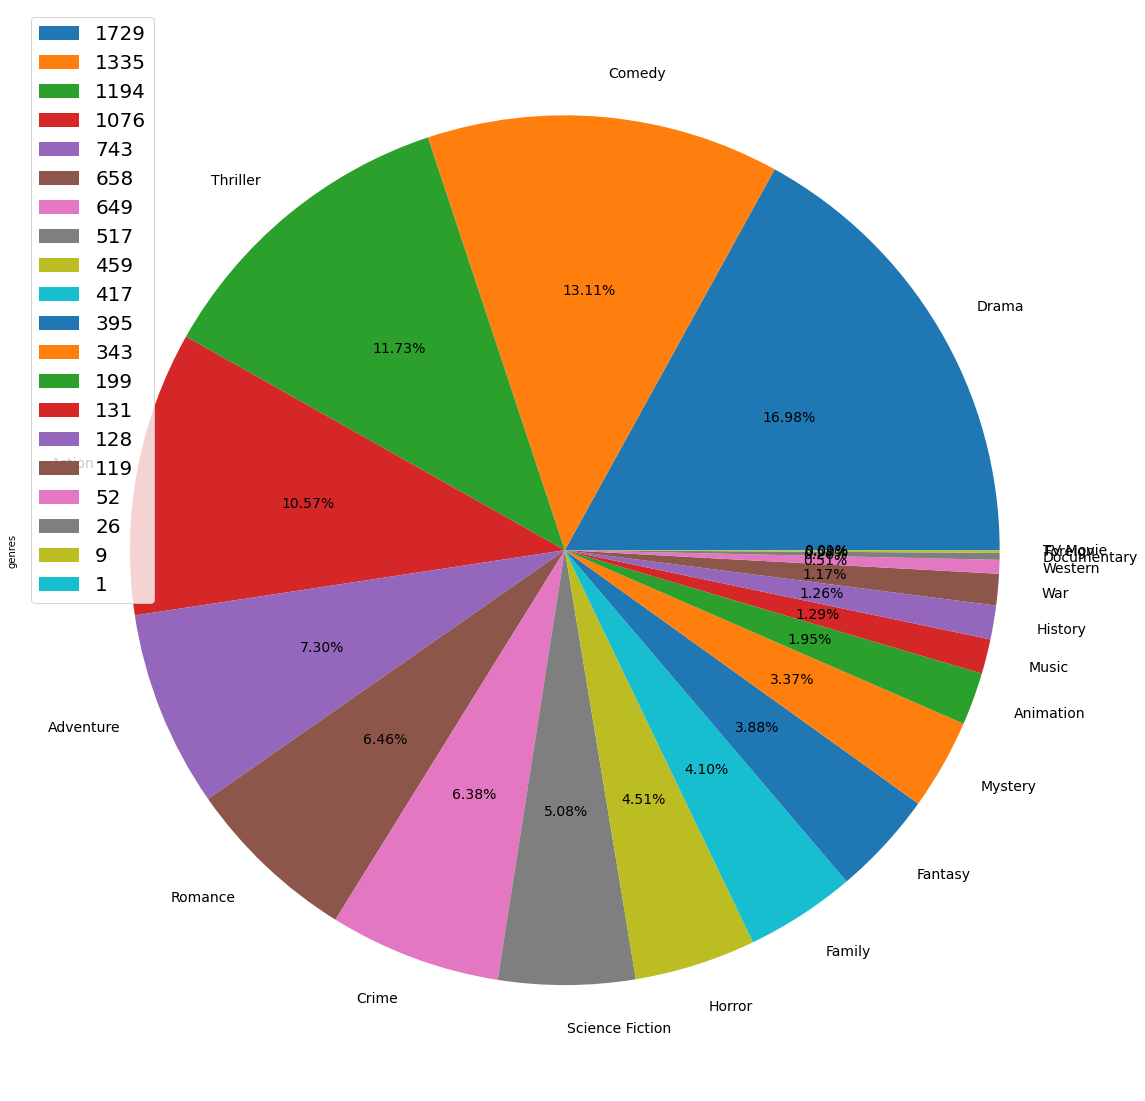

In [26]:
plot = pie_genres.plot.pie(y=pie_genres.values, fontsize=14 ,figsize=(20, 20), autopct='%.2f%%')
plot.legend(pie_genres.values, fontsize=20);

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 3  (What is the profit?)

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.budget.head()

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
Name: budget, dtype: int64

In [29]:
df.revenue.head()

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
Name: revenue, dtype: int64

In [30]:
area_graph_df = df.groupby('release_year')[['revenue', 'budget']].sum()/10000000000 #dividing by 10^6 so as it turns in Billions
area_graph_df.head()

,revenue,budget
release_year,,
1960,0.012901,0.002081
1961,0.033772,0.003864
1962,0.020633,0.003945
1963,0.017653,0.006111
1964,0.032861,0.003394


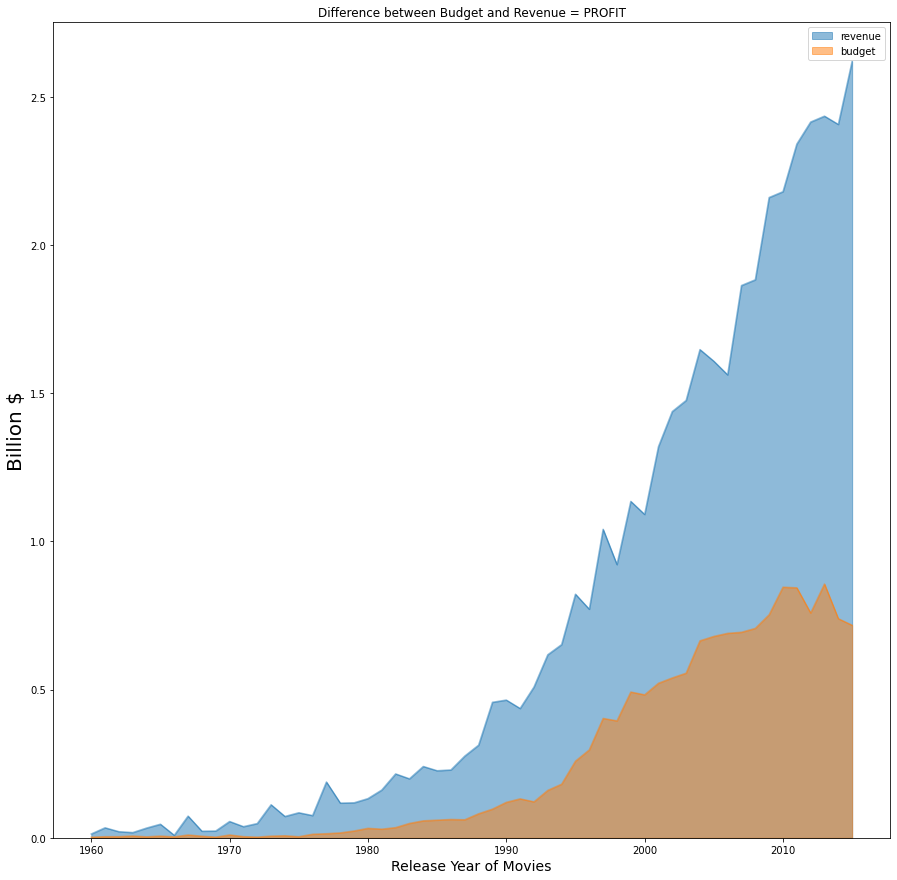

In [31]:
#Ploting in area so as we can deduce the profit visually
ax = area_graph_df.plot.area(stacked=False, figsize=(15,15))
plt.xlabel('Release Year of Movies', fontsize = 14)
#on y-axis
plt.ylabel('Billion $', fontsize = 20)
#title of the line plot
plt.title('Difference between Budget and Revenue = PROFIT');

### Research Question 4  (What's the expected runtime of a movie?)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


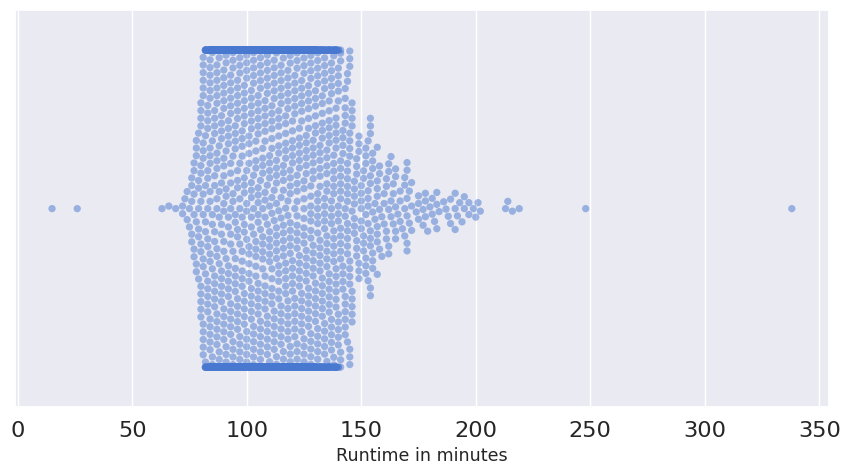

In [40]:
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn
sns.swarmplot(df['runtime'], alpha=.5, palette="muted")
sns.set_theme(style="white")
plt.xlabel('Runtime in minutes', fontsize = 12)
plt.show();

### Research Question 5  (Does this industry grow?)

In [41]:
df['profit_in_millions'] = (df['revenue']-df['budget'])/1000000

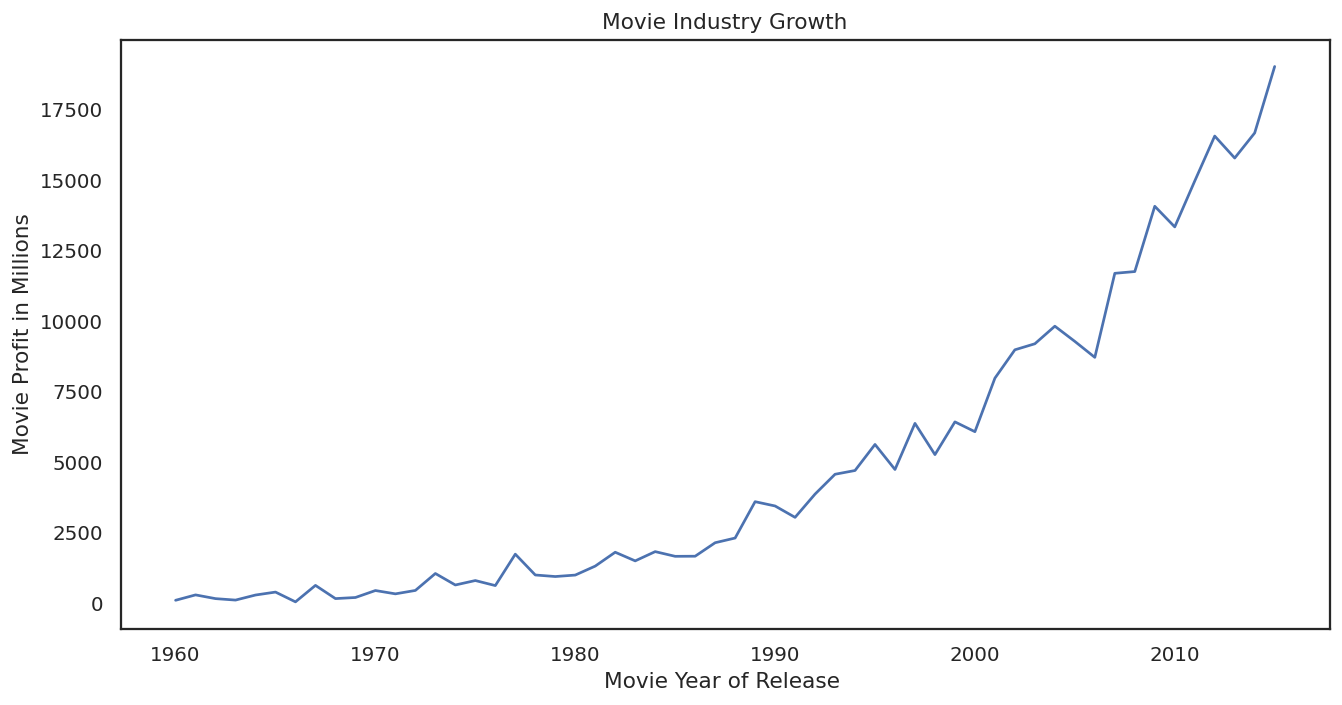

In [42]:
profits_year = df.groupby('release_year')['profit_in_millions'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Movie Year of Release ', fontsize = 12)
plt.ylabel('Movie Profit in Millions', fontsize = 12)
#title of the line plot
plt.title('Movie Industry Growth')
plt.plot(profits_year)
plt.show()

### Research Question 3  (What is the distrbution of Movies Votes?)

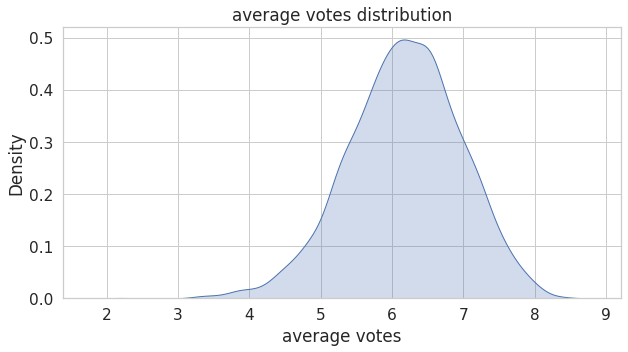

In [43]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.4)
vote_df = df[["vote_average"]]
sns.set_style("whitegrid")
ax = sns.kdeplot(vote_df.vote_average, shade=True, color="b")
ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

### Research Question 3  (Does the number of voters affect the average vote?)

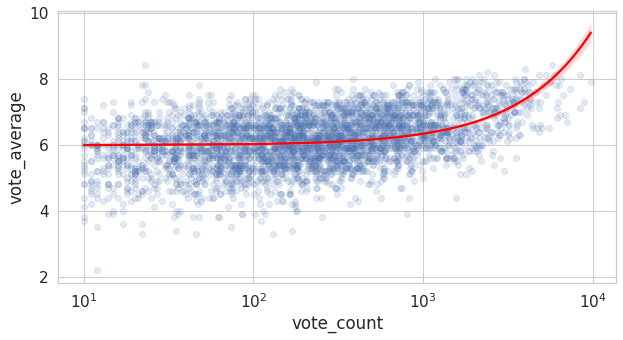

In [45]:
splot = sns.regplot(x="vote_count", y="vote_average", 
                    data=df,
                    scatter_kws={'alpha':0.15},
                    line_kws={'color': 'red'})
splot.set(xscale="log");

### Research Question 3  (What is the profit?)

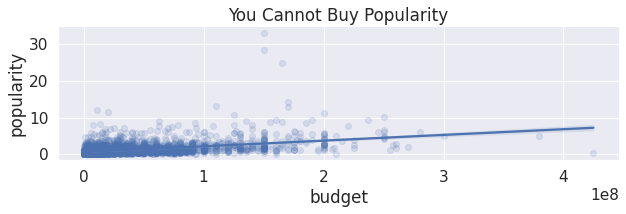

In [39]:
sns.set(rc={'figure.figsize':(100,5)}, font_scale=1.4)

# temp_df = df[["vote_average"]]


# sns.set_style("whitegrid")
# ax = sns.distplot(temp_df.vote_average, hist=False, rug=True)
ax = sns.lmplot(y="popularity", x="budget", scatter_kws={'alpha':0.15}, data=df, height=3, aspect=3)

# ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='budget', title = 'You Cannot Buy Popularity')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0